In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IRIS DATASET

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Accuracy Score: 1.0000
Error Score: 0.0000

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



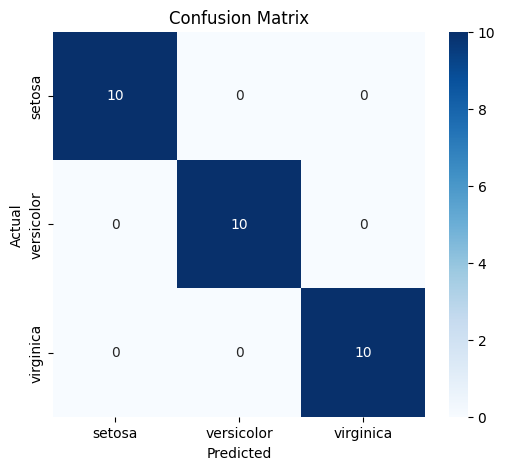

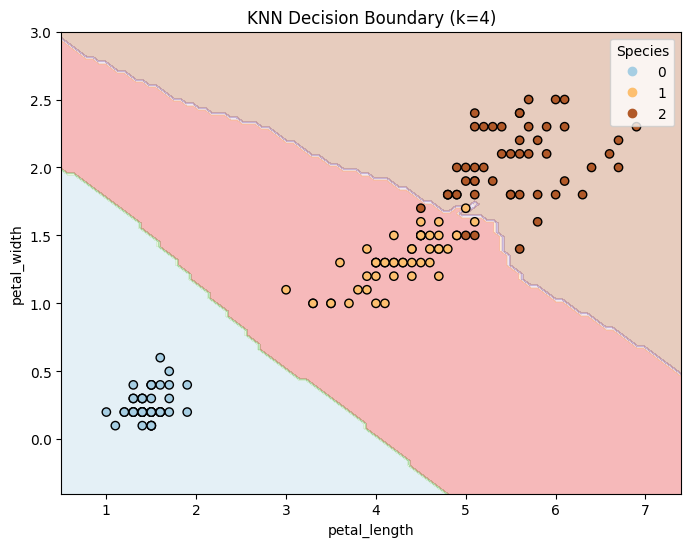

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = "/content/drive/MyDrive/ML_LAB/Lab-4/iris.csv"
df = pd.read_csv(file_path)

# Selecting two features for visualization
feature_1 = "petal_length"
feature_2 = "petal_width"
X = df[[feature_1, feature_2]].values

# Encoding labels into numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["species"])

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose an appropriate k value
k = 4  # You can experiment with different k values
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
error_score = 1 - accuracy  # Calculate error score

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\nAccuracy Score: {accuracy:.4f}")
print(f"Error Score: {error_score:.4f}")  # Print error score
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Decision boundary plot
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict the classification for each point in mesh
Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# Labels and titles
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title(f"KNN Decision Boundary (k={k})")

# Fix legend issue
plt.legend(*scatter.legend_elements(), title="Species")

plt.show()


In [11]:
# Choose an appropriate k value
k = 6  # You can experiment with different k values
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
error_score = 1 - accuracy  # Calculate error score

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\nAccuracy Score: {accuracy:.4f}")
print(f"Error Score: {error_score:.4f}")  # Print error score


Accuracy Score: 0.9333
Error Score: 0.0667


DIABETES DATASET

Accuracy: 74.03%
Confusion Matrix:
[[86 13]
 [27 28]]


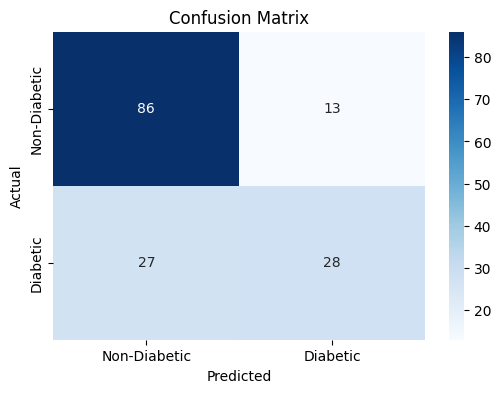

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        99
           1       0.68      0.51      0.58        55

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the diabetes dataset
file_path = "/content/drive/MyDrive/ML_LAB/Lab-4/diabetes.csv"
df = pd.read_csv(file_path)

# Split dataset into features (X) and target (y)
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose an appropriate k value using the square root heuristic
k_value = int(np.sqrt(len(y_train)))
if k_value % 2 == 0:  # Ensure k is odd to avoid ties
    k_value += 1

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


HEART DATASET

Best k value: 5 with accuracy: 91.80%
Final Accuracy with k=5: 91.80%
Confusion Matrix:
[[27  2]
 [ 3 29]]


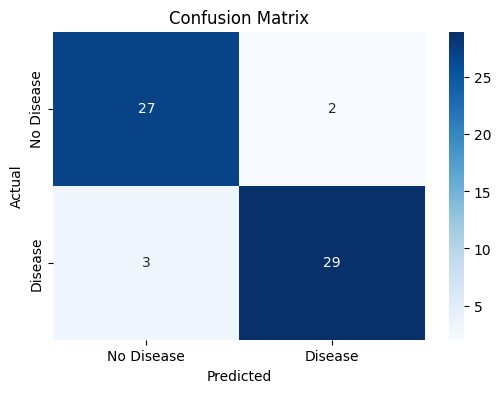

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        29
           1       0.94      0.91      0.92        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the heart dataset
file_path = "/content/drive/MyDrive/ML_LAB/Lab-4/heart.csv"
df = pd.read_csv(file_path)

# Split dataset into features (X) and target (y)
X = df.drop(columns=["target"])
y = df["target"]

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the best k-value by testing multiple values
best_k = 1
best_score = 0
for k in range(1, 21, 2):  # Testing odd values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best k value: {best_k} with accuracy: {best_score * 100:.2f}%")

# Train the KNN model with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Accuracy with k={best_k}: {accuracy * 100:.2f}%")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
